## **Marks prediction based on study hours**
The Python Scikit-Learn library for machine learning can be used to implement regression functions. We will perform simple linear regression involving two variables.

# GRIP@The Sparks Foundation
## Author : Tanay Tewar
### **Simple Linear Regression**
In this, we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression as it involves just two variables.

In [169]:
# Importing libraries
import pandas as pd
import numpy as np  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn import metrics  
import matplotlib.pyplot as plt  
%matplotlib inline
print('Libraries imported')

Libraries imported


In [170]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
print(type(data))
print(data.shape)

data.head()

Data imported successfully
<class 'pandas.core.frame.DataFrame'>
(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


As there is no issues with the data, and all the values are proper, there is no need to clean the data. We'll plot our data points on 2-D graph to get a visual of our dataset and see if we can find any relationship between the data. We can create the plot with the following script:

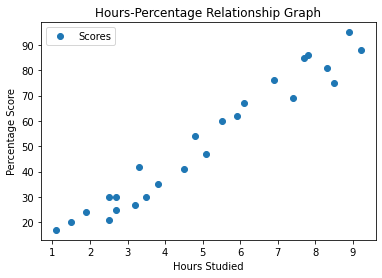

In [171]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours-Percentage Relationship Graph')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).
This will signify what are the outputs for which inputs.

In [172]:
x = data.iloc[:, 0:1].values  #all rows and the first column,i.e Hours column is selected
y = data.iloc[:, 1:2].values  #all rows and the second column,i.e Scores column is selected

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [173]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)
#print ("X_train: ", X_train)
#print ("y_train: ", y_train)
#print("X_test: ", X_test)
#print ("y_test: ", y_test)
#type(y_test)

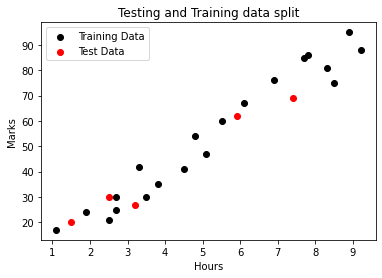

In [174]:
#Plotting the split of training and testing data
plt.scatter(X_train,y_train, label="Training Data", color="black")
plt.scatter(X_test,y_test, label="Test Data", color="red")
plt.xlabel("Hours")
plt.ylabel("Marks")
plt.title("Testing and Training data split")
plt.legend()

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [175]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


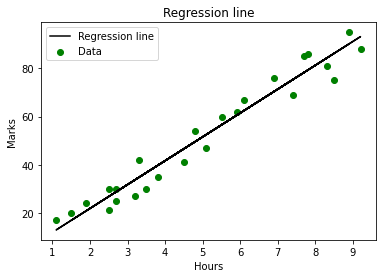

In [176]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_ #this signifies the equation mx+c, where m=slope, c=intercept

# Plotting for the test data
plt.scatter(X, y, label="Data",color="green")
plt.plot(X, line, label="Regression line",color="black");
plt.xlabel("Hours")
plt.ylabel("Marks")
plt.title("Regression line")
plt.legend()
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [177]:
y_pred = regressor.predict(X_test) # Predicting the scores
y_pred


array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

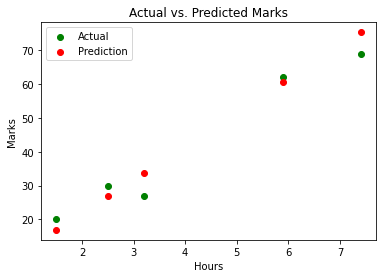

In [178]:
# Comparing the actual vs the predicted marks
plt.scatter(X_test, y_test, label="Actual",color="green")
plt.scatter(X_test, y_pred, label="Prediction",color="red")
plt.xlabel("Hours")
plt.ylabel("Marks")
plt.title("Actual vs. Predicted Marks")
plt.legend()
plt.legend()

### Making prediction of own value on hours

In [179]:
hours = [9.25]
hours = np.array(hours).reshape((len(hours), 1))
hours.reshape(-1, 1)
own_pred = regressor.predict(hours)
print("No. of Hours = {}".format(hours[0][0]))
print("Predicted Marks = {}".format(own_pred[0][0]))

No. of Hours = 9.25
Predicted Marks = 93.69173248737538


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [180]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


**This way a linear regression model was trained to predict the marks of a student based on the number of hours they studied.**